In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from scipy import optimize

%matplotlib inline 
import matplotlib.pyplot as plt

from simul_functions import generate_toy_data, get_bootstrap_data, set_intensity, get_data_to_fit
from simul_functions import get_attenuation_parameters


In [2]:
# input parameters for the simualtions
minE = 10**15 #eV
maxE = 10**18 #eV
gamma = -2.5 # slope of the spectrum

#relation between energy and s38
A = 10**12
B = 1.2

#attenuation true numbers
alpha = 0.919
beta = -1.13

#number of events to generate
events = 10000
#number of bins for the zenith 
nr_of_bins = 8

data = generate_toy_data(events, minE, maxE, gamma, A, B, alpha, beta)

#print(data)

(array([ 89., 102.,  83., 102., 107., 108., 119., 102.,  99.,  87.,  91.,
        114., 107., 116., 101., 110., 110., 109., 108., 108., 109.,  98.,
         90., 105.,  89.,  98.,  83.,  99., 107., 116., 110.,  98.,  95.,
         92., 110., 105.,  88.,  87., 105.,  98.,  96.,  89., 117., 103.,
        100.,  95., 100.,  88., 103.,  83.,  92.,  97., 108.,  92., 103.,
         92., 110., 111., 108., 102.,  97., 101., 105.,  88., 104., 104.,
         92.,  85., 112., 107., 129.,  86., 102.,  94., 101.,  96., 106.,
        107.,  99.,  89., 102.,  96., 101., 107.,  98.,  76.,  92., 103.,
        100., 104.,  89.,  94., 103.,  86., 104., 103.,  82., 114.,  95.,
        104.]),
 array([0.41333989, 0.4192063 , 0.42507271, 0.43093912, 0.43680553,
        0.44267194, 0.44853835, 0.45440477, 0.46027118, 0.46613759,
        0.472004  , 0.47787041, 0.48373682, 0.48960323, 0.49546964,
        0.50133605, 0.50720246, 0.51306887, 0.51893528, 0.52480169,
        0.5306681 , 0.53653451, 0.54240092, 0.

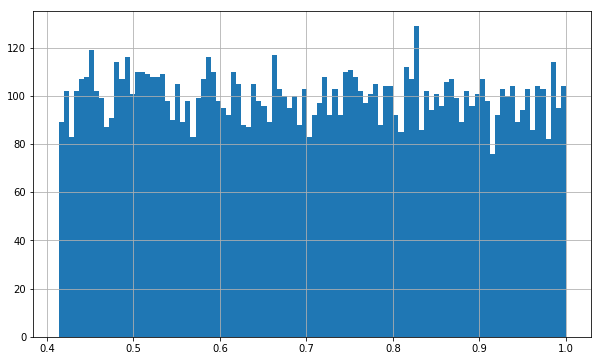

In [3]:
fig1, ax1 =plt.subplots(figsize=(10,6))
plt.grid()

ax1.hist(data.cos2,bins=100 )


In [4]:
#### fit the attenuation curve
data = set_intensity(data, nr_of_bins)
#print(data)        
    
### input value the reference intesity
intensity = 100
s125_fit, bins2, s38_fit , s125_fit_error= get_data_to_fit(data, intensity, nr_of_bins)
print(bins2)
values, cov = get_attenuation_parameters(s125_fit, bins2, performMCMC = False )

print(values)

[0.45524419 0.53905277 0.62286136 0.70666995 0.79047853 0.87428712
 0.95809571]
[  0.91327544  -1.18166528 778.02157538]


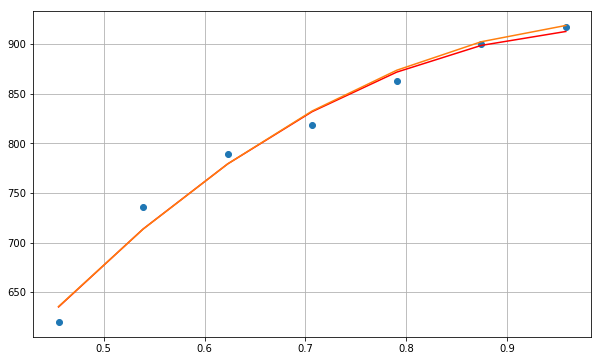

In [5]:
fig2, ax2 =plt.subplots(figsize=(10,6))
plt.grid()
from simul_functions import get_s125 
a1=values[0]
a2=values[1]
a3=values[2]
y=get_s125(bins2, a1,a2,a3)
y2=get_s125(bins2, alpha, beta, a3)

ax2.plot(bins2, s125_fit, lw=0, marker='o')
ax2.plot(bins2,y, color="r")
ax2.plot(bins2,y2)

(2, 4)

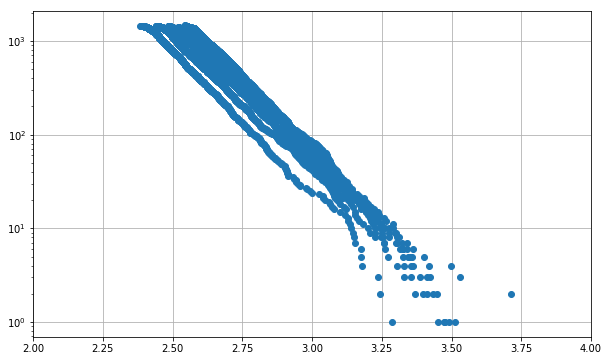

In [6]:
#groups = dict(list(data))
#print(groups)


    
fig1, ax1 =plt.subplots(figsize=(10,6))
plt.grid()

ax1.plot(np.log10(data.s125),data.I, lw=0, marker='o' )
ax1.set_yscale('log')
ax1.set_xlim(2,4)



[  0.96812279  -1.25820065 781.71694179]
[  0.88949922  -1.24612469 775.69157465]


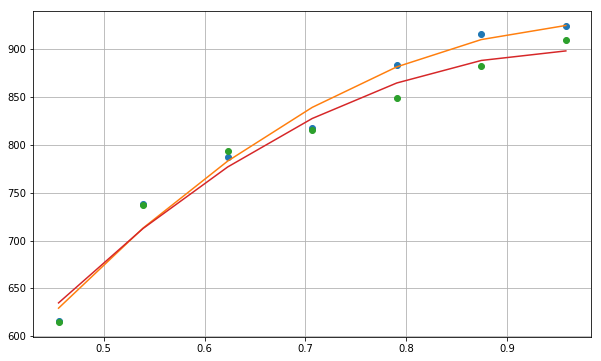

In [7]:
### number of boostrap samples as input
samples = 2
from simul_functions import get_s125

fig2, ax2 = plt.subplots(figsize=(10,6))
plt.grid()
a=[alpha,beta,1]
bootstrap_values=[]
bootstrap_values_2=[]
for j in range(0, samples):
    new_data = get_bootstrap_data(data)
    new_data=set_intensity(new_data, nr_of_bins)
    s125_fit, bins, s38_fit, s125_fit_error = get_data_to_fit(new_data, intensity, nr_of_bins)
    vals, cov_bt = get_attenuation_parameters(s125_fit, bins, performMCMC = False )
    bootstrap_values.append(vals)
    bootstrap_values_2.append(vals**2)
    ax2.plot(bins, s125_fit, lw=0, marker='o')
    ax2.plot(bins, get_s125(bins,vals[0], vals[1], vals[2]))
    print(vals)


Things to do:
1. From the bootstrap get all the values and plot them in an histogram and one vs each other (in one canvas)
2. Give final results: values(from original data) +- rms(vals)
3. Implement MCMC fit in the get_attenuation_parameters function
4. Compare results with 2.
5. See/write to Ioana/Zig

In [ ]:
from simul_functions import bootstrap_graphs

plot=bootstrap_graphs(bootstrap_values, alpha, beta)

In [ ]:
plot.savefig("bootstrap_values2")

In [ ]:
#final results with error
from simul_functions import rms_for_initial_vals

error=rms_for_initial_vals(bootstrap_values, bootstrap_values_2)
final_values_up=values + error
final_values_down=values - error

print(values,'+/-',error)
print(final_values_up)

[  0.88949922  -1.24612469 775.69157465]


/home/noemie/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/noemie/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


[ 7.42770114e-01 -5.11148679e-01  8.00553086e+02] 0.0
[ 7.54764042e-01 -5.25988217e-01  7.96853054e+02] 0.0
[ 7.54764042e-01 -5.25988217e-01  7.96853054e+02] 0.0
[ 7.54764042e-01 -5.25988217e-01  7.96853054e+02] 0.0
[ 9.08618591e-01 -6.47537463e-01  7.83275215e+02] 0.0
[ 8.53027167e-01 -5.94118254e-02  7.81475658e+02] 0.0
[ 9.14923459e-01 -2.84381953e-01  7.62667123e+02] 0.0
[ 9.05907233e-01 -9.02659858e-02  7.62260143e+02] 0.0
[ 9.05907233e-01 -9.02659858e-02  7.62260143e+02] 0.0
[ 9.12651592e-01 -4.09541337e-02  7.61063452e+02] 0.0
[ 8.78417004e-01 -5.97600998e-01  7.62756314e+02] 0.0
[ 8.89792046e-01 -6.18482219e-01  7.63019193e+02] 0.0
[  0.97014345  -1.1303148  767.37152207] 0.0
[  0.97014345  -1.1303148  767.37152207] 0.0
[  0.97014345  -1.1303148  767.37152207] 0.0
[  0.87868928  -0.86178236 766.69194801] 0.0
[  0.87868267  -0.86186039 766.68507659] 0.0
[  0.87868267  -0.86186039 766.68507659] 0.0
[  0.87868267  -0.86186039 766.68507659] 0.0
[  0.86882094  -0.88204644 755.077437

[  0.87036386  -1.11025703 778.19507191] 0.0
[  0.81675847  -0.90109947 778.91906329] 0.0
[  0.81675847  -0.90109947 778.91906329] 0.0
[ 8.73547825e-01 -8.30118595e-02  7.60586670e+02] 0.0
[ 8.78849246e-01 -2.81873469e-01  7.60451888e+02] 0.0
[ 9.06691464e-01 -4.97230000e-01  7.59338749e+02] 0.0
[ 9.06691464e-01 -4.97230000e-01  7.59338749e+02] 0.0
[ 8.30695694e-01 -6.80812946e-01  7.64936806e+02] 0.0
[ 8.30695694e-01 -6.80812946e-01  7.64936806e+02] 0.0
[ 8.31078533e-01 -6.54146060e-01  7.67994862e+02] 0.0
[ 8.31078533e-01 -6.54146060e-01  7.67994862e+02] 0.0
[ 7.92666546e-01 -5.19764327e-01  7.71954664e+02] 0.0
[ 7.21576679e-01 -5.84345664e-01  7.69915346e+02] 0.0
[ 7.21576679e-01 -5.84345664e-01  7.69915346e+02] 0.0
[ 7.28077601e-01 -5.90924452e-01  7.73271725e+02] 0.0
[ 7.28077601e-01 -5.90924452e-01  7.73271725e+02] 0.0
[ 7.28077601e-01 -5.90924452e-01  7.73271725e+02] 0.0
[ 7.28077601e-01 -5.90924452e-01  7.73271725e+02] 0.0
[ 7.90412289e-01 -4.83676873e-01  7.69075838e+02] 0.0
[

[ 7.99404992e-01 -1.83241175e+00  8.28074436e+02] 0.0
[ 7.99404992e-01 -1.83241175e+00  8.28074436e+02] 0.0
[ 7.99404992e-01 -1.83241175e+00  8.28074436e+02] 0.0
[ 7.87686829e-01 -1.74848784e+00  8.23648693e+02] 0.0
[ 7.77520532e-01 -1.81405350e+00  8.27868052e+02] 0.0
[ 6.36735170e-01 -1.79806717e+00  8.43895534e+02] 0.0
[ 6.29137559e-01 -1.79646751e+00  8.44640091e+02] 0.0
[ 6.29137559e-01 -1.79646751e+00  8.44640091e+02] 0.0
[ 6.29137559e-01 -1.79646751e+00  8.44640091e+02] 0.0
[ 6.29137559e-01 -1.79646751e+00  8.44640091e+02] 0.0
[ 6.29137559e-01 -1.79646751e+00  8.44640091e+02] 0.0
[ 6.29137559e-01 -1.79646751e+00  8.44640091e+02] 0.0
[ 6.29137559e-01 -1.79646751e+00  8.44640091e+02] 0.0
[ 6.29682633e-01 -1.78760781e+00  8.44220619e+02] 0.0
[ 6.29682633e-01 -1.78760781e+00  8.44220619e+02] 0.0
[ 6.29682633e-01 -1.78760781e+00  8.44220619e+02] 0.0
[ 6.29682633e-01 -1.78760781e+00  8.44220619e+02] 0.0
[ 6.94646216e-01 -1.81704256e+00  8.30617541e+02] 0.0
[ 7.41013391e-01 -1.67070825

[  0.90911521  -0.9483938  734.21160066] 0.0
[  0.90911521  -0.9483938  734.21160066] 0.0
[  0.88619485  -1.32399548 730.22182265] 0.0
[  0.88619485  -1.32399548 730.22182265] 0.0
[  0.88619485  -1.32399548 730.22182265] 0.0
[  0.82830658  -1.77823784 716.31164982] 0.0
[  0.82830658  -1.77823784 716.31164982] 0.0
[  0.82830658  -1.77823784 716.31164982] 0.0
[  0.82830658  -1.77823784 716.31164982] 0.0
[  0.84881476  -1.81517405 748.89726419] 0.0
[  0.84881476  -1.81517405 748.89726419] 0.0
[  0.84881476  -1.81517405 748.89726419] 0.0
[  0.8184125   -1.84617214 745.27734282] 0.0
[  0.8184125   -1.84617214 745.27734282] 0.0
[  0.75193159  -1.33179199 740.45274355] 0.0
[  0.7483037   -1.33299787 739.70407365] 0.0
[  0.7483037   -1.33299787 739.70407365] 0.0
[  0.7483037   -1.33299787 739.70407365] 0.0
[  0.7483037   -1.33299787 739.70407365] 0.0
[ 6.90714808e-01 -1.11606185e+00  7.70478681e+02] 0.0
[ 4.62548245e-01 -8.68611370e-01  7.67017080e+02] 0.0
[ 4.62548245e-01 -8.68611370e-01  7.6

[ 8.67268330e-01 -4.76384135e-01  7.65938739e+02] 0.0
[ 8.67268330e-01 -4.76384135e-01  7.65938739e+02] 0.0
[ 8.67268330e-01 -4.76384135e-01  7.65938739e+02] 0.0
[ 8.17658988e-01 -2.82518955e-01  7.65884505e+02] 0.0
[ 8.52787649e-01 -1.31416952e-01  7.63115670e+02] 0.0
[ 8.52787649e-01 -1.31416952e-01  7.63115670e+02] 0.0
[ 9.67986804e-01 -2.51994019e-02  7.65639808e+02] 0.0
[ 9.67986804e-01 -2.51994019e-02  7.65639808e+02] 0.0
[ 9.67986804e-01 -2.51994019e-02  7.65639808e+02] 0.0
[ 8.66445123e-01 -6.23435036e-01  7.85162415e+02] 0.0
[ 8.29269888e-01 -4.88928382e-01  7.90099915e+02] 0.0
[ 8.29269888e-01 -4.88928382e-01  7.90099915e+02] 0.0
[  0.82647898  -0.87692505 779.93032601] 0.0
[  0.86959801  -0.99788664 779.4481672 ] 0.0
[  0.85569081  -1.05077568 779.70074062] 0.0
[  0.85569081  -1.05077568 779.70074062] 0.0
[  0.85569081  -1.05077568 779.70074062] 0.0
[  0.81160542  -1.08969335 782.12684188] 0.0
[  0.81160542  -1.08969335 782.12684188] 0.0
[  0.81160542  -1.08969335 782.126841

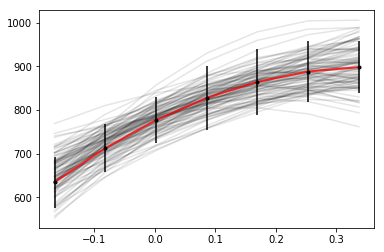

In [8]:
from simul_functions import get_attenuation_parameters2

final_parameters, cov2, sample, sample2 = get_attenuation_parameters2(s125_fit, s38_fit,s125_fit_error, bins, performMCMC=True)

In [9]:
#print(final_parameters)
#print(sample)
print(sample)
print(sample2)

[[ 7.42770114e-01 -5.11148679e-01  8.00553086e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 ...
 [-1.45741979e+00  9.82625216e-01 -1.24850009e+03]
 [-1.45741979e+00  9.82625216e-01 -1.24850009e+03]
 [-1.45741979e+00  9.82625216e-01 -1.24850009e+03]]
[[ 7.42770114e-01 -5.11148679e-01  8.00553086e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 ...
 [ 6.91078560e-01 -6.40569653e-01  7.89749238e+02]
 [ 5.44643661e-01 -2.10457083e-01  8.03312318e+02]
 [ 5.40662772e-01 -2.05008562e-01  8.04803645e+02]]


778.0215753779029
[[ 7.42770114e-01 -5.11148679e-01  8.00553086e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 ...
 [ 6.91078560e-01 -6.40569653e-01  7.89749238e+02]
 [ 5.44643661e-01 -2.10457083e-01  8.03312318e+02]
 [ 5.40662772e-01 -2.05008562e-01  8.04803645e+02]]
[[ 7.42770114e-01 -5.11148679e-01  8.00553086e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 ...
 [ 6.91078560e-01 -6.40569653e-01  7.89749238e+02]
 [ 5.44643661e-01 -2.10457083e-01  8.03312318e+02]
 [ 5.40662772e-01 -2.05008562e-01  8.04803645e+02]]


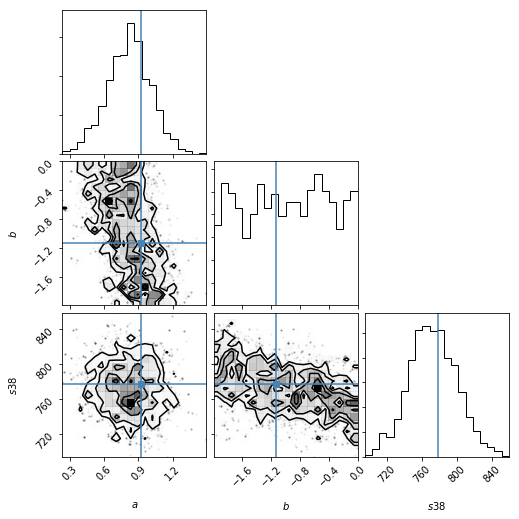

In [10]:
print(a3)
print(sample2)
import corner
fig = corner.corner(sample2, labels=["$a$","$b$", "$s38$"], truths=[alpha,beta, a3])
fig.savefig("")
print(sample2)

In [12]:
print(sample2)
print(sample2[:,2])
exp_sample2 = np.exp(sample2[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(exp_sample2, [16, 50, 84],
                                                axis=0)))

[[ 7.42770114e-01 -5.11148679e-01  8.00553086e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 [ 7.54764042e-01 -5.25988217e-01  7.96853054e+02]
 ...
 [ 6.91078560e-01 -6.40569653e-01  7.89749238e+02]
 [ 5.44643661e-01 -2.10457083e-01  8.03312318e+02]
 [ 5.40662772e-01 -2.05008562e-01  8.04803645e+02]]
[800.55308573 796.8530542  796.8530542  ... 789.74923802 803.31231818
 804.8036448 ]


/home/noemie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: zip argument #1 must support iteration